In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
import scipy.stats as scs
import datetime

In [6]:
du=xr.open_dataset('uwind_Ind-Pac.nc')
du_IND = du.sel(longitude=slice(,120),latitude=slice(30,-30),time=slice('1980-01-01T00:00:00.000000000','2022-12-01T00:00:00.000000000'))
du_IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
du_200IND=du_IND.isel(level=0,expver=0)
du_850IND=du_IND.isel(level=1,expver=0)

In [8]:
du_200IND = du_200IND.drop(['level','expver'])
du_850IND = du_850IND.drop(['level','expver'])

In [9]:
du_850IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [15]:
du_200IND_May_TS=du_200IND.groupby('time.month')[5]
du_850IND_May_TS=du_850IND.groupby('time.month')[5]
du_850IND_May_TS

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-05-01 1981-05-01 ... 2022-05-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [17]:
du_200IND_May_Clm=du_200IND_May_TS.mean('time')
du_850IND_May_Clm=du_850IND_May_TS.mean('time')
du_200IND_May_Clm

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
Data variables:
    u          (latitude, longitude) float32 29.78 29.74 29.71 ... 39.08 39.04

In [19]:
du_200IND_May_Anm = du_200IND_May_TS - du_200IND_May_Clm
du_850IND_May_Anm = du_850IND_May_TS - du_850IND_May_Clm
du_850IND_May_Anm

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-05-01 1981-05-01 ... 2022-05-01
Data variables:
    u          (time, latitude, longitude) float32 5.426 5.344 ... 2.341 2.389

In [20]:
du_200IND_May_Anm

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-05-01 1981-05-01 ... 2022-05-01
Data variables:
    u          (time, latitude, longitude) float32 11.67 11.62 ... 9.965 9.962

In [115]:
du1_200IND_May_Anm=du_200IND_May_Anm.astype('float64')
du1_850IND_May_Anm=du_850IND_May_Anm.astype('float64')

In [117]:
du1_200IND_May_Anm

<xarray.Dataset>
Dimensions:    (time: 43, latitude: 241, longitude: 401)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-05-01 1981-05-01 ... 2022-05-01
Data variables:
    u          (time, latitude, longitude) float64 11.67 11.62 ... 9.965 9.962

In [116]:
du1_850IND_May_Anm

<xarray.Dataset>
Dimensions:    (time: 43, latitude: 241, longitude: 401)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-05-01 1981-05-01 ... 2022-05-01
Data variables:
    u          (time, latitude, longitude) float64 5.426 5.344 ... 2.341 2.389

In [118]:
da = du1_200IND_May_Anm.to_dataframe()
dc = du1_850IND_May_Anm.to_dataframe()
db

time          u  year
latitude longitude                            
 30.0    20.00     1980-05-01  11.669291  1980
         20.25     1980-05-01  11.620882  1980
         20.50     1980-05-01  11.557884  1980
         20.75     1980-05-01  11.488935  1980
         21.00     1980-05-01  11.409824  1980
...                       ...        ...   ...
-30.0    119.00    2022-05-01   9.974152  2022
         119.25    2022-05-01   9.969902  2022
         119.50    2022-05-01   9.966595  2022
         119.75    2022-05-01   9.964634  2022
         120.00    2022-05-01   9.962269  2022

[4155563 rows x 3 columns]

In [26]:
da.reset_index(inplace=True,level=['time'])

In [27]:
da['year']=pd.DatetimeIndex(da['time']).year
da

time          u  year
latitude longitude                            
 30.0    20.00     1980-05-01  11.669291  1980
         20.25     1980-05-01  11.620882  1980
         20.50     1980-05-01  11.557884  1980
         20.75     1980-05-01  11.488935  1980
         21.00     1980-05-01  11.409824  1980
...                       ...        ...   ...
-30.0    119.00    2022-05-01   9.974152  2022
         119.25    2022-05-01   9.969902  2022
         119.50    2022-05-01   9.966595  2022
         119.75    2022-05-01   9.964634  2022
         120.00    2022-05-01   9.962269  2022

[4155563 rows x 3 columns]

In [28]:
da1=da.drop(['time'], axis=1)

In [29]:
da2=da1.set_index(['year'], append=True)
da2

u
latitude longitude year           
 30.0    20.00     1980  11.669291
         20.25     1980  11.620882
         20.50     1980  11.557884
         20.75     1980  11.488935
         21.00     1980  11.409824
...                            ...
-30.0    119.00    2022   9.974152
         119.25    2022   9.969902
         119.50    2022   9.966595
         119.75    2022   9.964634
         120.00    2022   9.962269

[4155563 rows x 1 columns]

In [30]:
da2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4155563 entries, (30.0, 20.0, 1980) to (-30.0, 120.0, 2022)
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   u       float64
dtypes: float64(1)
memory usage: 51.5 MB


In [31]:
da3=da2.to_xarray()
da3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 401, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    u          (latitude, longitude, year) float64 4.155 -0.3667 ... 0.3155 2.39

In [33]:
du200 = da3.u
du200

<xarray.DataArray 'u' (latitude: 241, longitude: 401, year: 43)>
array([[[ 4.15450287e+00, -3.66735458e-01,  4.99586487e+00, ...,
         -4.69102287e+00,  6.47127151e+00, -2.92019081e+00],
        [ 4.11211205e+00, -4.29857254e-01,  4.91546440e+00, ...,
         -4.67640114e+00,  6.61892128e+00, -2.89347458e+00],
        [ 4.07723427e+00, -4.83739853e-01,  4.84430504e+00, ...,
         -4.66117668e+00,  6.76544380e+00, -2.87652397e+00],
        ...,
        [ 3.74363327e+00, -6.05900955e+00, -4.61448669e-01, ...,
          4.47787857e+00, -3.24966431e-01,  9.96659470e+00],
        [ 3.59136581e+00, -6.07997131e+00, -3.94302368e-01, ...,
          4.46036911e+00, -2.02533722e-01,  9.96463394e+00],
        [ 3.43869400e+00, -6.09788895e+00, -3.17199707e-01, ...,
          4.43899918e+00, -8.05130005e-02,  9.96226883e+00]],

       [[ 3.97361183e+00, -2.33194351e-01,  4.85643578e+00, ...,
         -4.82526588e+00,  6.68946648e+00, -3.02679253e+00],
        [ 3.93821716e+00, -3.04870605e-01,  4.77957916e+00, ...,
         -4.80883217e+00,  6.83547211e+00, -3.00344658e+00],
        [ 3.91021729e+00, -3.63967896e-01,  4.70838737e+00, ...,
         -4.79364204e+00,  6.97678185e+00, -2.98825645e+00],
...
        [-7.14687347e-01,  2.64730072e+00,  1.12854004e-01, ...,
          3.90329742e+00,  2.16510773e-01,  2.32596207e+00],
        [-7.49599457e-01,  2.65039825e+00,  6.41212463e-02, ...,
          3.78027725e+00,  1.97147369e-01,  2.42235184e+00],
        [-7.62336731e-01,  2.64284515e+00,  2.54707336e-02, ...,
          3.67770386e+00,  1.72317505e-01,  2.52191162e+00]],

       [[ 1.16692905e+01,  1.10130882e+00,  1.48139000e+00, ...,
         -5.01627159e+00, -1.35905571e+01,  2.16035271e+00],
        [ 1.16208820e+01,  1.12891197e+00,  1.43643188e+00, ...,
         -4.95411491e+00, -1.36856155e+01,  2.46956062e+00],
        [ 1.15578842e+01,  1.16093826e+00,  1.40108109e+00, ...,
         -4.89444542e+00, -1.37797070e+01,  2.77282715e+00],
        ...,
        [-9.72782135e-01,  2.42203140e+00, -3.54286194e-01, ...,
          3.80932999e+00,  3.67866516e-01,  2.22508240e+00],
        [-1.00387955e+00,  2.42203140e+00, -3.90567780e-01, ...,
          3.67284393e+00,  3.47133636e-01,  2.30455399e+00],
        [-1.02344513e+00,  2.42665482e+00, -4.29138184e-01, ...,
          3.54098511e+00,  3.15475464e-01,  2.39037323e+00]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

In [34]:
do=pd.read_csv('Onset_deviation.csv')

In [35]:
dp = do.set_index(["Onset year"])
dx=dp.to_xarray()

In [36]:
dv=dx.rename({'Onset year':'year'})
dev=dv.deviation
dev

<xarray.DataArray 'deviation' (year: 43)>
array([  0,  -2,  -4,  11,  -1,  -4,   3,   1,  -7,   2, -13,   1,   4,
        -4,  -4,   7,   2,   8,   1,  -7,  -1,  -6,   8,  12,   3,   6,
        -6,  -4,  -1,  -9,  -1,  -3,   4,   0,   5,   4,   7,  -2,  -3,
         7,   0,   2,  -3], dtype=int64)
Coordinates:
  * year     (year) int64 1980 1981 1982 1983 1984 ... 2018 2019 2020 2021 2022

# reg_u200

In [38]:
reg_u200_onset = xr.cov( du200, dev, dim="year")/du200.var(dim='year',skipna=True).values
reg_u200_onset

<xarray.DataArray (latitude: 241, longitude: 401)>
array([[-0.22772743, -0.22742418, -0.2273469 , ...,  0.03589623,
         0.03208625,  0.02826654],
       [-0.23989997, -0.23953257, -0.23962583, ...,  0.01879022,
         0.01505203,  0.01119676],
       [-0.2517586 , -0.25137817, -0.25136747, ...,  0.00143952,
        -0.00227647, -0.00620963],
       ...,
       [-0.00148813, -0.00293214, -0.00441116, ...,  0.14974023,
         0.14886343,  0.14866438],
       [-0.00172726, -0.00299764, -0.00444563, ...,  0.15312101,
         0.15211498,  0.15172947],
       [-0.00149173, -0.00253218, -0.00391962, ...,  0.15505023,
         0.15458212,  0.15408385]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

In [119]:
dc.reset_index(inplace=True,level=['time'])

In [120]:
dc

time         u
latitude longitude                     
 30.0    20.00     1980-05-01  5.426240
         20.25     1980-05-01  5.343515
         20.50     1980-05-01  5.257535
         20.75     1980-05-01  5.167655
         21.00     1980-05-01  5.068660
...                       ...       ...
-30.0    119.00    2022-05-01  2.178273
         119.25    2022-05-01  2.240229
         119.50    2022-05-01  2.290935
         119.75    2022-05-01  2.340510
         120.00    2022-05-01  2.388885

[4155563 rows x 2 columns]

In [121]:
dc['year']=pd.DatetimeIndex(dc['time']).year

In [122]:
dc1=dc.drop(['time'], axis=1)

In [123]:
dc2=dc1.set_index(['year'], append=True)
dc2

u
latitude longitude year          
 30.0    20.00     1980  5.426240
         20.25     1980  5.343515
         20.50     1980  5.257535
         20.75     1980  5.167655
         21.00     1980  5.068660
...                           ...
-30.0    119.00    2022  2.178273
         119.25    2022  2.240229
         119.50    2022  2.290935
         119.75    2022  2.340510
         120.00    2022  2.388885

[4155563 rows x 1 columns]

In [124]:
dc3=dc2.to_xarray()
dc3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 401, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    u          (latitude, longitude, year) float64 2.022 -3.933 ... 4.397 1.033

In [126]:
du850 = dc3.u
du850

<xarray.DataArray 'u' (latitude: 241, longitude: 401, year: 43)>
array([[[ 2.02238560e+00, -3.93279457e+00,  2.23315811e+00, ...,
         -1.95982933e+00,  3.49779129e+00, -1.67304039e+00],
        [ 2.04749680e+00, -3.91977787e+00,  2.17879772e+00, ...,
         -1.91398525e+00,  3.51253700e+00, -1.72048855e+00],
        [ 2.08168697e+00, -3.91841316e+00,  2.14042664e+00, ...,
         -1.85560799e+00,  3.52599525e+00, -1.79341316e+00],
        ...,
        [ 3.71451092e+00,  4.87277031e-01,  1.12304878e+00, ...,
         -2.05507278e-01, -2.59064674e-01,  2.29093456e+00],
        [ 3.67943287e+00,  4.85023499e-01,  1.19853973e+00, ...,
         -1.87028885e-01, -2.19854355e-01,  2.34051037e+00],
        [ 3.64142513e+00,  4.81568336e-01,  1.27282810e+00, ...,
         -1.64568901e-01, -1.81845665e-01,  2.38888550e+00]],

       [[ 1.95259571e+00, -3.76417160e+00,  2.26702595e+00, ...,
         -2.02270889e+00,  3.52647686e+00, -1.72900963e+00],
        [ 1.98662758e+00, -3.74223232e+00,  2.21467590e+00, ...,
         -1.97140026e+00,  3.54668808e+00, -1.78999805e+00],
        [ 2.02230358e+00, -3.74110794e+00,  2.17951965e+00, ...,
         -1.90289879e+00,  3.55644989e+00, -1.87179947e+00],
...
        [-1.25000954e+00,  1.07194138e+00, -1.80112648e+00, ...,
          1.42265224e+00,  4.69135094e+00,  1.06848621e+00],
        [-1.22244644e+00,  1.13232899e+00, -1.81157207e+00, ...,
          1.41393471e+00,  4.65326309e+00,  1.10295963e+00],
        [-1.17728710e+00,  1.19303703e+00, -1.81133175e+00, ...,
          1.40899181e+00,  4.62067795e+00,  1.15157413e+00]],

       [[ 5.42623997e+00,  5.50835609e-01, -1.32883835e+00, ...,
         -6.37700748e+00, -5.75505733e+00, -3.97639275e-01],
        [ 5.34351540e+00,  5.99411964e-01, -1.26298618e+00, ...,
         -6.49428558e+00, -5.76867485e+00, -3.57701302e-01],
        [ 5.25753498e+00,  6.51641846e-01, -1.20557308e+00, ...,
         -6.61654758e+00, -5.78036785e+00, -3.21020126e-01],
        ...,
        [-1.10207558e+00,  9.19265747e-01, -1.82595730e+00, ...,
          1.39609432e+00,  4.42292213e+00,  9.19265747e-01],
        [-1.07491302e+00,  9.61977005e-01, -1.85580635e+00, ...,
          1.39215946e+00,  4.41898727e+00,  9.79253769e-01],
        [-1.03851414e+00,  1.00183105e+00, -1.86259937e+00, ...,
          1.38191223e+00,  4.39664650e+00,  1.03292847e+00]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

# reg_u850

In [127]:
reg_u850_onset = xr.cov( du850, dev, dim="year")/du850.var(dim='year',skipna=True).values
reg_u850_onset

<xarray.DataArray (latitude: 241, longitude: 401)>
array([[-0.0076774 , -0.00308255,  0.00061779, ...,  0.2821774 ,
         0.27775178,  0.27356873],
       [ 0.00554321,  0.00880345,  0.01141872, ...,  0.27571443,
         0.27049579,  0.26610834],
       [ 0.01444433,  0.01555589,  0.01711051, ...,  0.26505899,
         0.26039986,  0.25704098],
       ...,
       [ 0.12916064,  0.12814039,  0.12653286, ...,  0.16289816,
         0.16679159,  0.17296513],
       [ 0.14905106,  0.14926173,  0.14792184, ...,  0.13599023,
         0.13816931,  0.14348544],
       [ 0.17185048,  0.17170372,  0.17017189, ...,  0.10794297,
         0.10612287,  0.10876207]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

# v_wind

In [51]:
dv=xr.open_dataset('vwind_Ind-Pac.nc')
dv

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [52]:
dv_IND=dv.sel(longitude=slice(20,120),latitude=slice(30,-30))
dv_IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [94]:
dv_200IND=dv_IND.isel(level=0,expver=0)
dv_850IND=dv_IND.isel(level=1,expver=0)
dv_850IND.v.values

array([[[-0.87227994, -0.92190707, -0.97581244, ...,  0.63108003,
          0.61567867,  0.5805973 ],
        [-0.78928286, -0.84404385, -0.89966047, ...,  0.9023181 ,
          0.8321556 ,  0.8047751 ],
        [-0.7114196 , -0.7678918 , -0.82436407, ...,  1.1230732 ,
          1.0743018 ,  1.1136612 ],
        ...,
        [-0.24680686, -0.15183079, -0.05685472, ..., -1.2025571 ,
         -1.1366729 , -1.0673659 ],
        [-0.22883844, -0.15354204, -0.07225621, ..., -1.1614864 ,
         -1.0819118 , -1.0057598 ],
        [-0.20915866, -0.14840817, -0.07995701, ..., -1.1614864 ,
         -1.0536757 , -0.9612665 ]],

       [[-5.6501756 , -5.680123  , -5.7023697 , ...,  1.9838475 ,
          1.9419211 ,  1.9085511 ],
        [-5.4473886 , -5.473058  , -5.4901705 , ...,  2.1113377 ,
          2.0172176 ,  1.9864143 ],
        [-5.2377567 , -5.258292  , -5.2745495 , ...,  2.186634  ,
          2.1318731 ,  2.139574  ],
        ...,
        [-1.7946602 , -1.7407548 , -1.6517683 , ..., -

In [95]:
dv_200IND.v.values

array([[[ 1.1282071 ,  1.0589002 ,  0.9895934 , ..., 12.6297245 ,
         12.634003  , 12.636569  ],
        [ 1.2454299 ,  1.1821126 ,  1.1247846 , ..., 12.792295  ,
         12.783739  , 12.783739  ],
        [ 1.3891774 ,  1.3344165 ,  1.2839338 , ..., 12.888127  ,
         12.893261  , 12.899251  ],
        ...,
        [-1.7518783 , -1.835731  , -1.9144499 , ..., -1.5448133 ,
         -1.3274806 , -1.1033028 ],
        [-1.5028869 , -1.5961517 , -1.6902721 , ..., -1.4686613 ,
         -1.2547512 , -1.0322847 ],
        [-1.238494  , -1.3326144 , -1.4352913 , ..., -1.3967875 ,
         -1.1922895 , -0.97581244]],

       [[-3.2056112 , -3.2398367 , -3.2740624 , ..., 13.804519  ,
         13.779705  , 13.755747  ],
        [-3.1020787 , -3.146572  , -3.1867871 , ..., 14.023562  ,
         14.0021715 , 13.971368  ],
        [-2.9805777 , -3.0293493 , -3.0729868 , ..., 14.201535  ,
         14.197257  , 14.16731   ],
        ...,
        [-1.5473802 , -1.4592493 , -1.3625618 , ..., -

In [54]:
dv_200IND = dv_200IND.drop(['level','expver'])
dv_850IND = dv_850IND.drop(['level','expver'])

In [55]:
dv_850IND

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [56]:
dv_200IND_May_TS=dv_200IND.groupby('time.month')[5]
dv_850IND_May_TS=dv_850IND.groupby('time.month')[5]

dv_200IND_May_Clm=dv_200IND_May_TS.mean('time')
dv_850IND_May_Clm=dv_850IND_May_TS.mean('time')

In [100]:
dv_200IND_May_TS.v.values

array([[[-2.6520119 , -2.7692347 , -2.887313  , ...,  1.5200905 ,
          1.516668  ,  1.5064002 ],
        [-2.8479533 , -2.9685988 , -3.082399  , ...,  1.402012  ,
          1.3960227 ,  1.3626527 ],
        [-3.0652862 , -3.1919208 , -3.308288  , ...,  1.2223276 ,
          1.2146269 ,  1.1975139 ],
        ...,
        [-1.4387139 , -1.3522942 , -1.2521843 , ...,  7.0013223 ,
          7.053517  ,  7.0962987 ],
        [-1.485774  , -1.4010657 , -1.3103678 , ...,  6.7095494 ,
          6.7660213 ,  6.8199267 ],
        [-1.5277004 , -1.4412807 , -1.3540055 , ...,  6.3955293 ,
          6.453713  ,  6.5110407 ]],

       [[-8.805778  , -8.773263  , -8.730481  , ...,  0.7226337 ,
          0.81589854,  0.9091631 ],
        [-8.674864  , -8.640638  , -8.591867  , ...,  0.7346126 ,
          0.8133315 ,  0.87836015],
        [-8.512293  , -8.4755    , -8.421595  , ...,  0.65674937,
          0.719211  ,  0.7756833 ],
        ...,
        [-0.03717494,  0.06207931,  0.15876663, ...,  

In [101]:
dv_850IND_May_TS.v.values

array([[[ 0.9040295 ,  0.84071195,  0.7722608 , ...,  2.1412854 ,
          2.168666  ,  2.1832118 ],
        [ 0.89803994,  0.8253106 ,  0.75942624, ...,  2.2439623 ,
          2.23455   ,  2.25423   ],
        [ 0.8621031 ,  0.7833842 ,  0.7140771 , ...,  2.3286705 ,
          2.3449278 ,  2.3911324 ],
        ...,
        [-2.4004536 , -2.3807738 , -2.3508265 , ..., -0.96383345,
         -0.9629778 , -0.96554476],
        [-2.4671936 , -2.4586372 , -2.435535  , ..., -0.92875224,
         -0.9390199 , -0.9441537 ],
        [-2.541634  , -2.5270884 , -2.5142536 , ..., -0.89709353,
         -0.90393865, -0.9073612 ]],

       [[-4.9245925 , -4.930582  , -4.9288707 , ...,  0.53695977,
          0.62680185,  0.6935419 ],
        [-4.809081  , -4.819349  , -4.82106   , ...,  0.6849855 ,
          0.7380351 ,  0.8081976 ],
        [-4.6670446 , -4.6850133 , -4.691003  , ...,  0.79279625,
          0.86381423,  0.95280087],
        ...,
        [-2.4466581 , -2.3320024 , -2.1985226 , ...,  

In [98]:
dv_200IND_May_Clm.v.values

array([[-4.388385 , -4.3510947, -4.3114767, ..., -2.2252464, -2.211297 ,
        -2.2035768],
       [-4.4070287, -4.370675 , -4.3262615, ..., -2.2085514, -2.196532 ,
        -2.2114968],
       [-4.4281816, -4.390773 , -4.341881 , ..., -2.243633 , -2.2390556,
        -2.2508757],
       ...,
       [ 2.504057 ,  2.5246322,  2.5467591, ...,  2.4200847,  2.4446993,
         2.4697514],
       [ 2.458529 ,  2.4800391,  2.5000772, ...,  2.385501 ,  2.410235 ,
         2.4363227],
       [ 2.4102151,  2.4367   ,  2.4603393, ...,  2.3473954,  2.3756113,
         2.4035885]], dtype=float32)

In [99]:
dv_850IND_May_Clm.v.values

array([[-2.9133005 , -2.9444818 , -2.9746878 , ...,  0.2574439 ,
         0.2713132 ,  0.27561128],
       [-2.9109323 , -2.943825  , -2.970688  , ...,  0.35343477,
         0.3335561 ,  0.34028178],
       [-2.9127634 , -2.9451184 , -2.9681013 , ...,  0.42785555,
         0.43384504,  0.46359345],
       ...,
       [-1.1722713 , -1.139041  , -1.0866079 , ..., -0.3006922 ,
        -0.29012614, -0.28160957],
       [-1.2402848 , -1.2098798 , -1.1564322 , ..., -0.297807  ,
        -0.2969713 , -0.28935003],
       [-1.309154  , -1.2693965 , -1.2230327 , ..., -0.30120972,
        -0.30025455, -0.29621512]], dtype=float32)

In [57]:
dv_200IND_May_Anm = dv_200IND_May_TS - dv_200IND_May_Clm
dv_850IND_May_Anm = dv_850IND_May_TS - dv_850IND_May_Clm

In [102]:
dv1_200IND_May_Anm=dv_200IND_May_Anm.astype('float64')
dv1_850IND_May_Anm=dv_850IND_May_Anm.astype('float64')

In [97]:
dv1_200IND_May_Anm.v.values

array([[[ 1.73637295e+00,  1.58186007e+00,  1.42416382e+00, ...,
          3.74533701e+00,  3.72796488e+00,  3.70997715e+00],
        [ 1.55907536e+00,  1.40207624e+00,  1.24386263e+00, ...,
          3.61056328e+00,  3.59255457e+00,  3.57414961e+00],
        [ 1.36289549e+00,  1.19885206e+00,  1.03359270e+00, ...,
          3.46596050e+00,  3.45368242e+00,  3.44838953e+00],
        ...,
        [-3.94277096e+00, -3.87692642e+00, -3.79894352e+00, ...,
          4.58123779e+00,  4.60881758e+00,  4.62654734e+00],
        [-3.94430304e+00, -3.88110495e+00, -3.81044507e+00, ...,
          4.32404852e+00,  4.35578632e+00,  4.38360405e+00],
        [-3.93791556e+00, -3.87798071e+00, -3.81434488e+00, ...,
          4.04813385e+00,  4.07810163e+00,  4.10745239e+00]],

       [[-4.41739273e+00, -4.42216825e+00, -4.41900444e+00, ...,
          2.94788027e+00,  3.02719545e+00,  3.11274004e+00],
        [-4.26783514e+00, -4.26996326e+00, -4.26560593e+00, ...,
          2.94316387e+00,  3.00986338e

In [96]:
dv1_850IND_May_Anm.v.values

array([[[ 1.73637295e+00,  1.58186007e+00,  1.42416382e+00, ...,
          3.74533701e+00,  3.72796488e+00,  3.70997715e+00],
        [ 1.55907536e+00,  1.40207624e+00,  1.24386263e+00, ...,
          3.61056328e+00,  3.59255457e+00,  3.57414961e+00],
        [ 1.36289549e+00,  1.19885206e+00,  1.03359270e+00, ...,
          3.46596050e+00,  3.45368242e+00,  3.44838953e+00],
        ...,
        [-3.94277096e+00, -3.87692642e+00, -3.79894352e+00, ...,
          4.58123779e+00,  4.60881758e+00,  4.62654734e+00],
        [-3.94430304e+00, -3.88110495e+00, -3.81044507e+00, ...,
          4.32404852e+00,  4.35578632e+00,  4.38360405e+00],
        [-3.93791556e+00, -3.87798071e+00, -3.81434488e+00, ...,
          4.04813385e+00,  4.07810163e+00,  4.10745239e+00]],

       [[-4.41739273e+00, -4.42216825e+00, -4.41900444e+00, ...,
          2.94788027e+00,  3.02719545e+00,  3.11274004e+00],
        [-4.26783514e+00, -4.26996326e+00, -4.26560593e+00, ...,
          2.94316387e+00,  3.00986338e

In [105]:
dq = dv1_200IND_May_Anm.to_dataframe()
dp = dv1_850IND_May_Anm.to_dataframe()
dq

v
time       latitude longitude          
1980-05-01  30.0    20.00      1.736373
                    20.25      1.581860
                    20.50      1.424164
                    20.75      1.264438
                    21.00      1.100095
...                                 ...
2022-05-01 -30.0    119.00    -1.948592
                    119.25    -1.872459
                    119.50    -1.802735
                    119.75    -1.735119
                    120.00    -1.668120

[4155563 rows x 1 columns]

# v_200

In [61]:
dq.reset_index(inplace=True,level=['time'])

In [62]:
dq['year']=pd.DatetimeIndex(dq['time']).year

In [63]:
dq1=dq.drop(['time'], axis=1)

In [69]:
dq2=dq1.set_index(['year'], append=True)
dq2

v
latitude longitude year          
 30.0    20.00     1980  1.736373
         20.25     1980  1.581860
         20.50     1980  1.424164
         20.75     1980  1.264438
         21.00     1980  1.100095
...                           ...
-30.0    119.00    2022 -1.948592
         119.25    2022 -1.872459
         119.50    2022 -1.802735
         119.75    2022 -1.735119
         120.00    2022 -1.668120

[4155563 rows x 1 columns]

In [70]:
dq3=dq2.to_xarray()
dq3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 401, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    v          (latitude, longitude, year) float64 -3.938 -2.689 ... 3.032

In [71]:
dv200 = dq3.v
dv200

<xarray.DataArray 'v' (latitude: 241, longitude: 401, year: 43)>
array([[[-3.93791556e+00, -2.68868065e+00, -8.83896351e-02, ...,
          6.28270721e+00, -6.09474778e-01,  1.94204497e+00],
        [-3.87798071e+00, -2.61676693e+00, -1.13422871e-02, ...,
          6.23996639e+00, -6.01734042e-01,  1.89074636e+00],
        [-3.81434488e+00, -2.54457450e+00,  7.88190365e-02, ...,
          6.20263577e+00, -5.95425725e-01,  1.82261395e+00],
        ...,
        [ 4.04813385e+00,  6.38916540e+00,  3.34692001e-02, ...,
         -1.33726656e+00, -5.88585043e+00, -1.80273497e+00],
        [ 4.07810163e+00,  6.24287128e+00, -1.18814468e-01, ...,
         -1.24483716e+00, -5.79598808e+00, -1.73511922e+00],
        [ 4.10745239e+00,  6.09595966e+00, -2.58024931e-01, ...,
         -1.16158116e+00, -5.71701050e+00, -1.66812027e+00]],

       [[-3.94430304e+00, -2.61121559e+00, -6.22630119e-02, ...,
          6.25407362e+00, -7.98969150e-01,  1.92282295e+00],
        [-3.88110495e+00, -2.53689384e+00,  2.06151009e-02, ...,
          6.20946169e+00, -7.81119943e-01,  1.86623144e+00],
        [-3.81044507e+00, -2.46110010e+00,  1.15232944e-01, ...,
          6.16289806e+00, -7.63509870e-01,  1.79057646e+00],
...
        [ 3.61056328e+00,  2.94316387e+00,  1.38932109e+00, ...,
          3.89891434e+00,  1.06588912e+00,  2.79257107e+00],
        [ 3.59255457e+00,  3.00986338e+00,  1.46714401e+00, ...,
          3.86208105e+00,  1.06413746e+00,  2.98504972e+00],
        [ 3.57414961e+00,  3.08985710e+00,  1.54542613e+00, ...,
          3.81372881e+00,  1.05856681e+00,  3.16943169e+00]],

       [[ 1.73637295e+00, -4.41739273e+00, -2.92686653e+00, ...,
         -3.99305344e-01, -1.99250746e+00,  9.96421051e+00],
        [ 1.58186007e+00, -4.42216825e+00, -2.96757936e+00, ...,
         -4.81088638e-01, -1.95450115e+00,  1.00766573e+01],
        [ 1.42416382e+00, -4.41900444e+00, -3.01233101e+00, ...,
         -5.64344406e-01, -1.90684414e+00,  1.01807871e+01],
        ...,
        [ 3.74533701e+00,  2.94788027e+00,  1.38291383e+00, ...,
          4.05336714e+00,  9.57660675e-01,  2.62530375e+00],
        [ 3.72796488e+00,  3.02719545e+00,  1.45452857e+00, ...,
          4.02915049e+00,  9.60824013e-01,  2.83039808e+00],
        [ 3.70997715e+00,  3.11274004e+00,  1.53322792e+00, ...,
          3.99490499e+00,  9.61660266e-01,  3.03231001e+00]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

# reg_v200

In [72]:
reg_v200_onset = xr.cov( dv200, dev, dim="year")/dv200.var(dim='year',skipna=True).values
reg_v200_onset

<xarray.DataArray (latitude: 241, longitude: 401)>
array([[-0.23116054, -0.24257141, -0.25350784, ...,  0.17369998,
         0.18385029,  0.19358934],
       [-0.22512319, -0.23636711, -0.24734892, ...,  0.17549011,
         0.18547419,  0.19511611],
       [-0.22300728, -0.23421655, -0.24495388, ...,  0.1783014 ,
         0.18840604,  0.19830102],
       ...,
       [-0.11638321, -0.12249025, -0.12824765, ..., -0.34009433,
        -0.34339407, -0.34596121],
       [-0.11593698, -0.12253089, -0.12869556, ..., -0.33081375,
        -0.33369686, -0.33630363],
       [-0.1144746 , -0.12178203, -0.12853578, ..., -0.32369559,
        -0.32614536, -0.32804239]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

# v_850

In [106]:
dp.reset_index(inplace=True,level=['time'])

In [107]:
dp

time         v
latitude longitude                     
 30.0    20.00     1980-05-01  3.817330
         20.25     1980-05-01  3.785194
         20.50     1980-05-01  3.746949
         20.75     1980-05-01  3.698296
         21.00     1980-05-01  3.642660
...                       ...       ...
-30.0    119.00    2022-05-01 -0.781299
         119.25    2022-05-01 -0.722280
         119.50    2022-05-01 -0.657490
         119.75    2022-05-01 -0.595983
         120.00    2022-05-01 -0.541839

[4155563 rows x 2 columns]

In [109]:
dp['year']=pd.DatetimeIndex(dp['time']).year

In [110]:
dp1=dp.drop(['time'], axis=1)
dp1

v  year
latitude longitude                
 30.0    20.00      3.817330  1980
         20.25      3.785194  1980
         20.50      3.746949  1980
         20.75      3.698296  1980
         21.00      3.642660  1980
...                      ...   ...
-30.0    119.00    -0.781299  2022
         119.25    -0.722280  2022
         119.50    -0.657490  2022
         119.75    -0.595983  2022
         120.00    -0.541839  2022

[4155563 rows x 2 columns]

In [111]:
dp2=dp1.set_index(['year'], append=True)
dp2

v
latitude longitude year          
 30.0    20.00     1980  3.817330
         20.25     1980  3.785194
         20.50     1980  3.746949
         20.75     1980  3.698296
         21.00     1980  3.642660
...                           ...
-30.0    119.00    2022 -0.781299
         119.25    2022 -0.722280
         119.50    2022 -0.657490
         119.75    2022 -0.595983
         120.00    2022 -0.541839

[4155563 rows x 1 columns]

In [112]:
dp3=dp2.to_xarray()
dp3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 401, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    v          (latitude, longitude, year) float64 -1.232 -1.204 ... 0.08594

In [113]:
dv850 = dp3.v
dv850

<xarray.DataArray 'v' (latitude: 241, longitude: 401, year: 43)>
array([[[-1.23248005e+00, -1.20424414e+00, -1.91442561e+00, ...,
          3.68830729e+00,  1.22748578e+00,  2.16441202e+00],
        [-1.25769186e+00, -1.13191271e+00, -1.87888670e+00, ...,
          3.67079663e+00,  1.24676740e+00,  2.20166206e+00],
        [-1.29122090e+00, -1.06019807e+00, -1.84482026e+00, ...,
          3.65780282e+00,  1.27655566e+00,  2.25455236e+00],
        ...,
        [-5.95883846e-01,  2.39714599e+00,  1.24764740e-02, ...,
          6.28537536e-01, -1.80747056e+00, -6.57489896e-01],
        [-6.03684068e-01,  2.33458495e+00,  2.35002935e-02, ...,
          6.13892078e-01, -1.79815793e+00, -5.95983386e-01],
        [-6.11146092e-01,  2.27321744e+00,  3.05841565e-02, ...,
          6.03007495e-01, -1.78080654e+00, -5.41839242e-01]],

       [[-1.22690880e+00, -1.23974335e+00, -1.82756817e+00, ...,
          3.61772680e+00,  1.14407063e+00,  2.19993091e+00],
        [-1.24875748e+00, -1.16404903e+00, -1.79208910e+00, ...,
          3.59758949e+00,  1.17869425e+00,  2.25252295e+00],
        [-1.27910280e+00, -1.08915043e+00, -1.75826120e+00, ...,
          3.58178997e+00,  1.22107840e+00,  2.31629801e+00],
...
        [ 1.89052749e+00,  3.31550747e-01,  1.03146446e+00, ...,
          1.19146907e+00,  1.44131625e+00,  1.56144410e-01],
        [ 1.90099394e+00,  4.04478997e-01,  1.08214617e+00, ...,
          1.21733737e+00,  1.41755724e+00,  2.35062331e-01],
        [ 1.91394830e+00,  4.67915833e-01,  1.14130473e+00, ...,
          1.25339365e+00,  1.40655327e+00,  3.22457135e-01]],

       [[ 3.81732988e+00, -2.01129198e+00, -1.80166006e+00, ...,
         -1.56464767e+00, -1.06324244e+00,  1.97428060e+00],
        [ 3.78519392e+00, -1.98610020e+00, -1.81668329e+00, ...,
         -1.46330404e+00, -1.11249161e+00,  2.07562447e+00],
        [ 3.74694872e+00, -1.95418286e+00, -1.81728053e+00, ...,
         -1.37491441e+00, -1.16870522e+00,  2.18711615e+00],
        ...,
        [ 1.88384151e+00,  2.79515862e-01,  1.09322965e+00, ...,
          1.32681954e+00,  1.37473547e+00, -8.58426094e-02],
        [ 1.89735270e+00,  3.55488658e-01,  1.12813199e+00, ...,
          1.33605254e+00,  1.36172163e+00, -1.31332874e-03],
        [ 1.90760052e+00,  4.17930603e-01,  1.16747141e+00, ...,
          1.34886718e+00,  1.35400105e+00,  8.59421492e-02]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

# reg_v850

In [114]:
reg_v850_onset = xr.cov( dv850, dev, dim="year")/dv850.var(dim='year',skipna=True).values
reg_v850_onset

<xarray.DataArray (latitude: 241, longitude: 401)>
array([[-0.25128581, -0.26226496, -0.27720973, ...,  0.03432162,
         0.05909403,  0.08435915],
       [-0.27276161, -0.28301703, -0.29588569, ...,  0.0426117 ,
         0.06428843,  0.08937229],
       [-0.29295269, -0.30358021, -0.31648954, ...,  0.05576312,
         0.07596293,  0.09931662],
       ...,
       [-0.20226606, -0.21237315, -0.22015237, ..., -0.398496  ,
        -0.40255024, -0.41712449],
       [-0.19735403, -0.2076198 , -0.21607972, ..., -0.39202823,
        -0.3966568 , -0.40628647],
       [-0.19482598, -0.20266307, -0.21038567, ..., -0.39842046,
        -0.40642714, -0.41134016]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

In [80]:
lat = ds3.latitude
lat

<xarray.DataArray 'latitude' (latitude: 241)>
array([-30.  , -29.75, -29.5 , ...,  29.5 ,  29.75,  30.  ])
Coordinates:
  * latitude  (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0

In [81]:
lon = ds3.longitude
lon

<xarray.DataArray 'longitude' (longitude: 401)>
array([ 20.  ,  20.25,  20.5 , ..., 119.5 , 119.75, 120.  ])
Coordinates:
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0

In [89]:
lon2D, lat2D = np.meshgrid(lon[::12], lat[::12])

In [90]:
lon2D, lat2D

(array([[ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,
          53.,  56.,  59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,
          86.,  89.,  92.,  95.,  98., 101., 104., 107., 110., 113., 116.,
         119.],
        [ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,
          53.,  56.,  59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,
          86.,  89.,  92.,  95.,  98., 101., 104., 107., 110., 113., 116.,
         119.],
        [ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,
          53.,  56.,  59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,
          86.,  89.,  92.,  95.,  98., 101., 104., 107., 110., 113., 116.,
         119.],
        [ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,
          53.,  56.,  59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,
          86.,  89.,  92.,  95.,  98., 101., 104., 107., 110., 113., 116.,
         119.],
        [ 20.,  23.,  26.,  29.,  32

In [128]:
reg_wspd200 = np.sqrt(reg_u200_onset**2 + reg_v200_onset**2)
reg_wspd850 = np.sqrt(reg_u850_onset**2 + reg_v850_onset**2) 

In [129]:
reg_wspd200, reg_wspd850

(<xarray.DataArray (latitude: 241, longitude: 401)>
 array([[0.32449187, 0.33250962, 0.34051848, ..., 0.1773703 , 0.18662919,
         0.19564209],
        [0.328987  , 0.33651934, 0.34438645, ..., 0.17649321, 0.18608396,
         0.19543711],
        [0.3363252 , 0.34358169, 0.3509815 , ..., 0.17830721, 0.18841979,
         0.19839822],
        ...,
        [0.11639273, 0.12252534, 0.12832349, ..., 0.37159964, 0.37427237,
         0.37655047],
        [0.11594984, 0.12256755, 0.12877232, ..., 0.36453228, 0.36673227,
         0.3689471 ],
        [0.11448432, 0.12180835, 0.12859553, ..., 0.3589142 , 0.36092441,
         0.36242742]])
 Coordinates:
   * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
   * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0,
 <xarray.DataArray (latitude: 241, longitude: 401)>
 array([[0.25140307, 0.26228308, 0.27721042, ..., 0.28425703, 0.28396858,
         0.28628013],
        [0.27281793, 0.28315392, 0

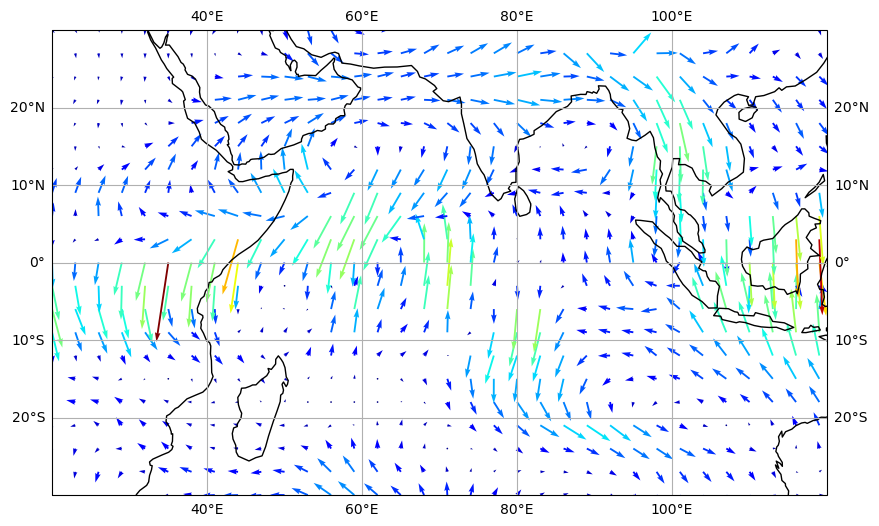

In [130]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, reg_u850_onset[::12,::12], reg_v850_onset[::12,::12], reg_wspd850[::12,::12],angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

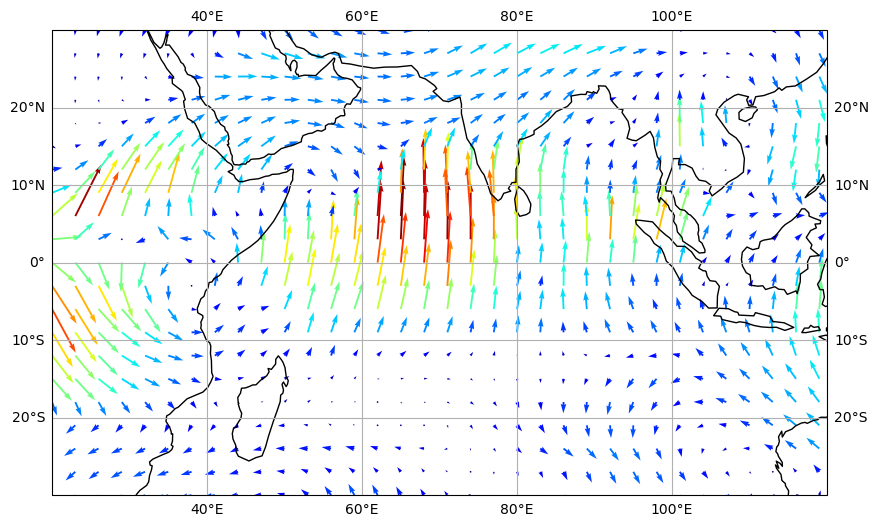

In [131]:
reg_v850_onsetprojection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, reg_u200_onset[::12,::12], reg_v200_onset[::12,::12], reg_wspd200[::12,::12],angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

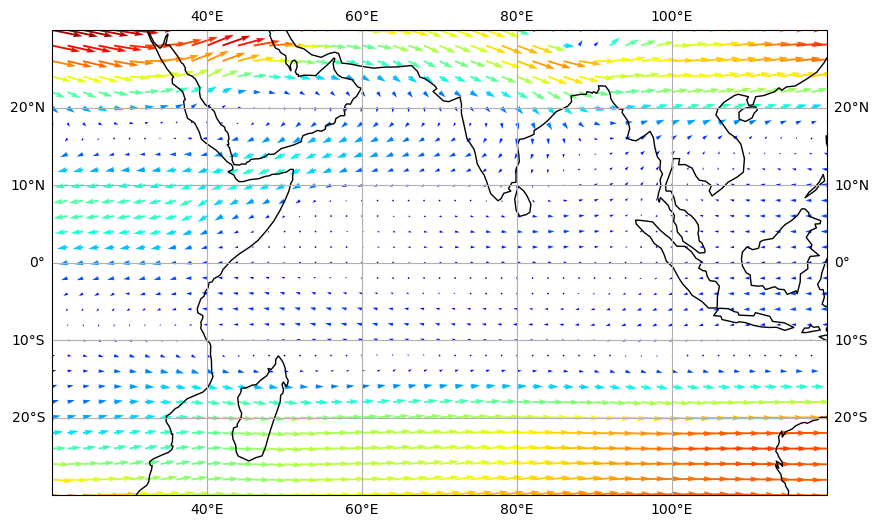

In [34]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, u850[::8,::8], v850[::8,::8], wspd850[::8,::8],cmap='jet', transform=ccrs.PlateCarree())

In [40]:
# projection = ccrs.PlateCarree()
# crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
# crs180 = ccrs.PlateCarree(central_longitude=180)
# fig=plt.figure(1, figsize=[10,10])
# ax=plt.subplot(1,1,1,projection=projection)
# ax.set_extent([20,120,-30,30], crs=crs0)
# ax.coastlines()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon, lat, u, v,wspd, cmap='jet',transform=ccrs.PlateCarree())

# ax.gridlines(crs=crs0, draw_labels=True)

In [41]:
import matplotlib.cm as cm

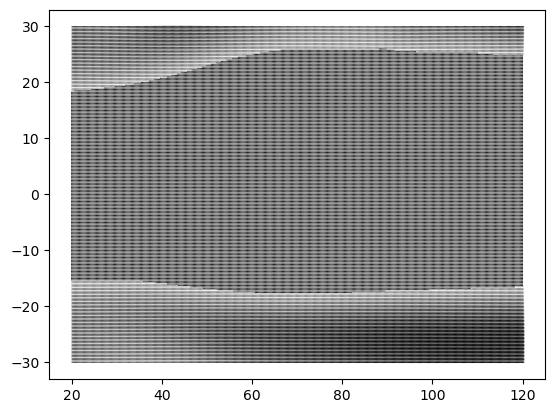

In [68]:
plt.figure()
plt.quiver(lon, lat, u, v,units='xy',cmap='jet')

NameError: name 'reg_u' is not defined

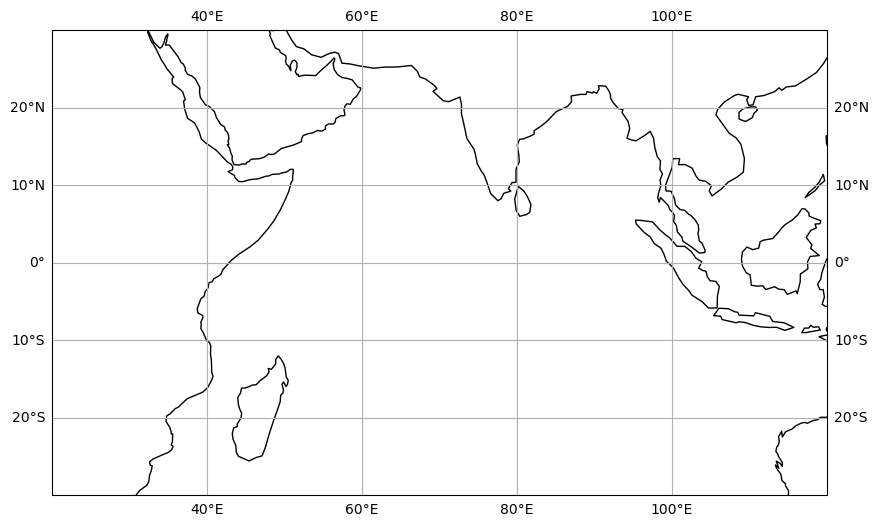

In [58]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon, lat, reg_u, reg_v, wspd, angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

In [45]:
conda install -c conda-forge metpy

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3

  added / updated specs:
    - metpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    importlib_resources-5.12.0 |     pyhd8ed1ab_0          30 KB  conda-forge
    metpy-1.4.0                |     pyhd8ed1ab_0         316 KB  conda-forge
    pint-0.20.1                |     pyhd8ed1ab_0         207 KB  conda-forge
    pooch-1.7.0                |     pyhd8ed1ab_0          49 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         603 KB

The following NEW packages will be INSTALLED:

  importlib_resourc~ conda-forge/noarch::importlib_resources-5.12.0-pyhd8ed1ab_0 
  metpy              conda-forge/noarch::metpy-1.4.0-pyhd8ed1ab_0 
  pint               conda-fo